# Boxplots 
**Use Case:** \
detecting outliers for numerical data \
\
**Code Logic:** \
You can adjust the config to use `iqr` or `zscore` boxplots \
You can choose which columns to generate (leave columns empty to generate for all numerical columns) \
You can adjust the fig size 

**Actionable Next Steps:** \
Removing Outliers 

In [156]:
from scipy.stats import zscore
from scipy.stats import iqr
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplots(df, config):
    method = config.get('method', 'zscore')
    columns = config.get('columns', None)
    figsize_multiplier = config.get('figsize_multiplier', 3)

    if columns is None:
        df_numeric = df.select_dtypes(include=['float64', 'int64'])
    else:
        df_numeric = df[columns]

    if method == 'zscore':
        df_numeric = df_numeric.apply(zscore)
    elif method == 'iqr':
        Q1 = df_numeric.quantile(0.25)
        Q3 = df_numeric.quantile(0.75)
        IQR = Q3 - Q1
        df_numeric = (df_numeric - Q1) / IQR

    n = len(df_numeric.columns)
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*figsize_multiplier, nrows*figsize_multiplier))

    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])

    axes = axes.ravel()

    for i, column in enumerate(df_numeric):
        df_numeric.boxplot(column, ax=axes[i])

    if n < nrows*ncols:
        for j in range(i+1, nrows*ncols):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

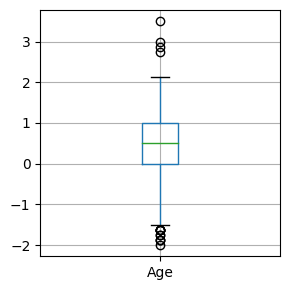

In [157]:
config = {
    'method': #'zscore',
    'iqr',
    'columns': ['Age'],
    'figsize_multiplier': 3
}
plot_boxplots(data2, config)

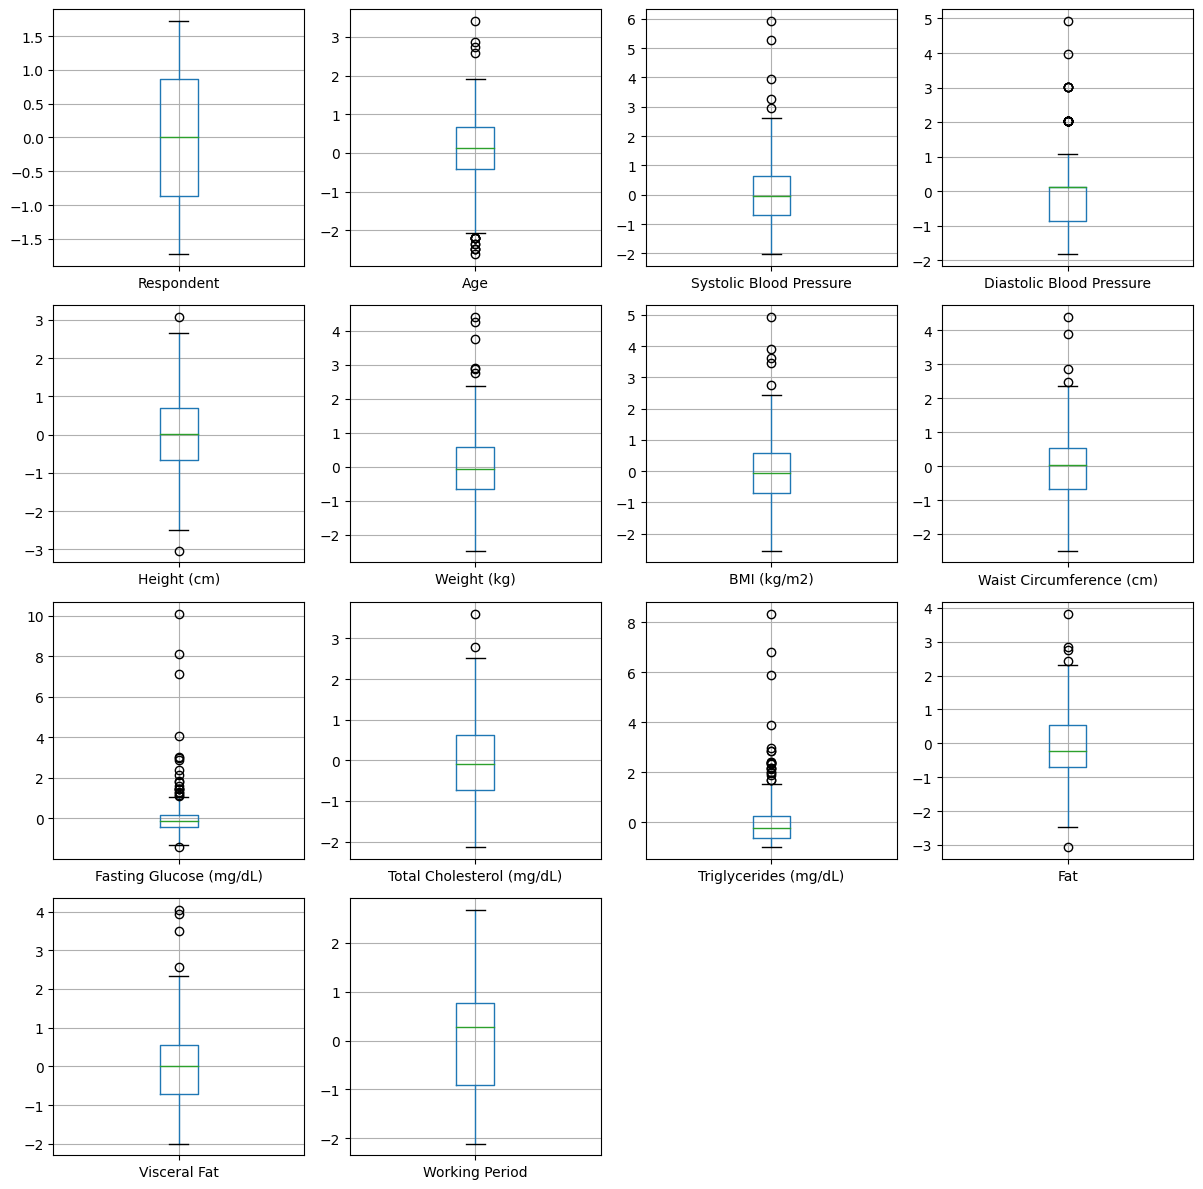

In [158]:
config = {
    'method': 'zscore',
    #'iqr',
    'figsize_multiplier': 3
}
plot_boxplots(df, config)

# Histogram
**Use Case:** \
For finding modus, data skewness, and data shape

**Code Logic:** \
First parameter is the dataframe you want to plot \
Second parameter is the default amount of bins \
Third parameter is the names of the columns to plot \
Fourth parameter is a dictionary of column names and custom
bin edges to plot

**Actionable Next Steps:** \
Preprocessing to reduce skewness

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_histogram(df, bins, columns, bin_edges=None):
    plotted_columns = set()
    num_plots = len(columns)
    matrix_size = math.ceil(math.sqrt(num_plots)) 

    fig, axs = plt.subplots(matrix_size, matrix_size, figsize=(10, 10))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        if column not in plotted_columns:
            if bin_edges and column in bin_edges:
                df[column].hist(bins=bin_edges[column], edgecolor='black', ax=axs[i])
            else:
                df[column].hist(bins=bins, edgecolor='black', ax=axs[i])
            axs[i].set_title(column)
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Frequency')
            plotted_columns.add(column)

    if num_plots < len(axs):
        for i in range(num_plots, len(axs)):
            fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

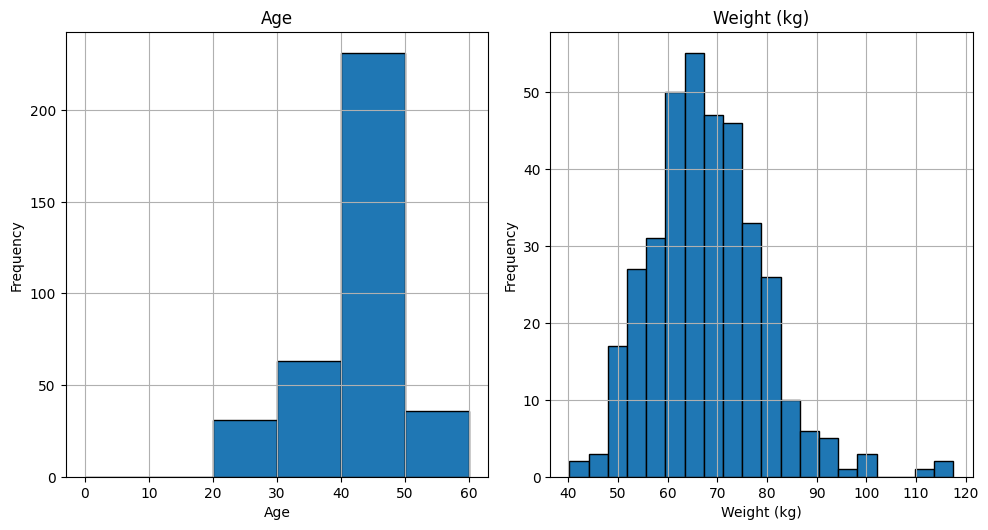

In [ ]:
columns = ['Age', 'Weight (kg)']
bins = 20
bin_edges = {'Age': [0,20,30,40,50,60]}
plot_histogram(df, bins, columns, bin_edges)

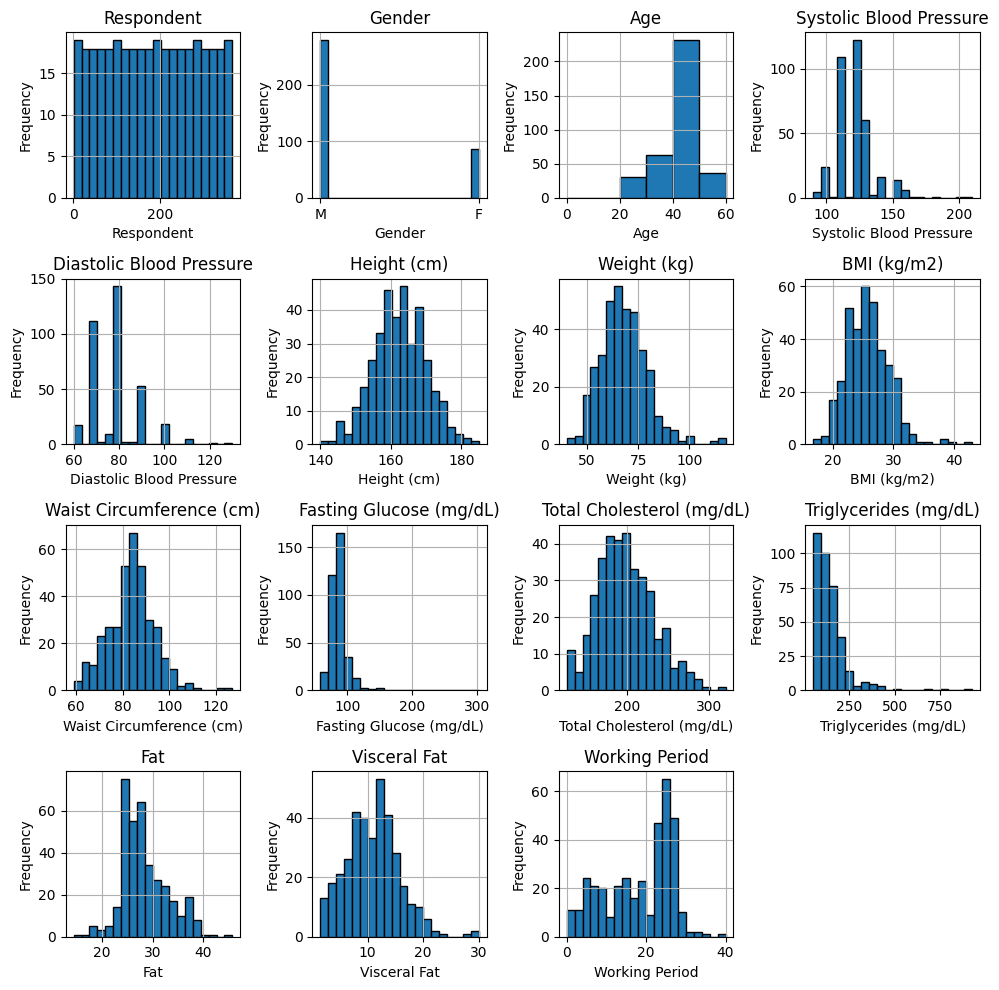

In [ ]:
columns = df.columns
bins = 20
bin_edges = {'Age': [0, 20,30,40,50,60]}
plot_histogram(df, bins, columns, bin_edges)

# Distribution
**Use Case:** \
Similar to Histograms, but visualizing \
distributions between groups of data is a lot cleaner.

**Code Logic:** \
First parameter is the dataframe you want to plot \
Second parameter is an array of features you want to plot \
Third parameter is the name of the feature you want use as hue (optional) \
Fourth parameter bins numerical hue features. Pass an integer if you want automated binning. Pass an array if you want custom bins. (optional)

**Actionable Next Steps:** \
Preprocessing to reduce skewness

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def create_density_plots(df, columns, hue=None, bins=None):
    df = df.copy()
    columns = [col for col in columns if pd.api.types.is_numeric_dtype(df[col])]

    if hue and pd.api.types.is_numeric_dtype(df[hue]):
        if isinstance(bins, int):
            df[hue] = pd.cut(df[hue], bins)
        elif isinstance(bins, (list, np.ndarray)):
            df[hue] = pd.cut(df[hue], bins)
        elif bins is None:
            df[hue] = pd.cut(df[hue], 10)

    n = len(columns)
    ncols = int(math.sqrt(n)) if n > 1 else 1
    nrows = n // ncols + (n % ncols > 0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
    if n == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, col in enumerate(columns):
        sns.kdeplot(data=df, x=col, hue=hue, common_norm=False, ax=axs[i],shade=True)

    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

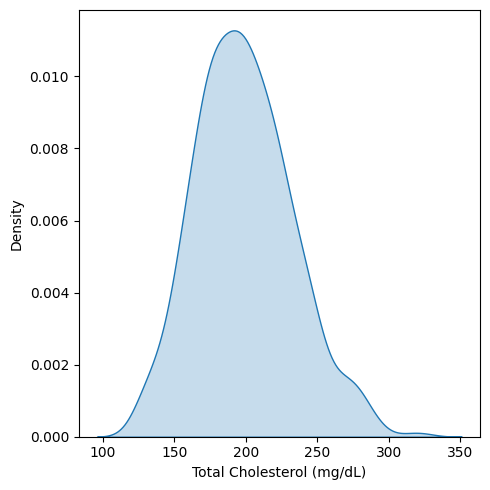

In [ ]:
create_density_plots(df, ['Total Cholesterol (mg/dL)'])

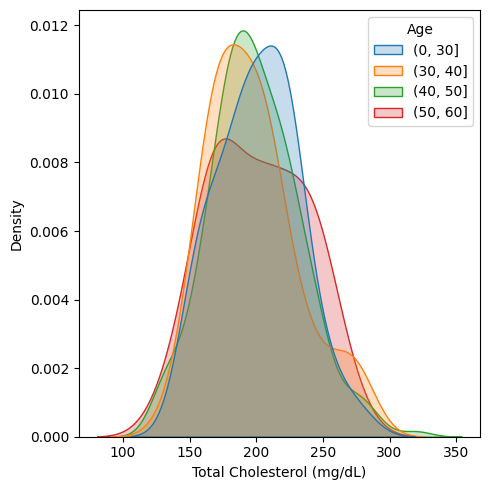

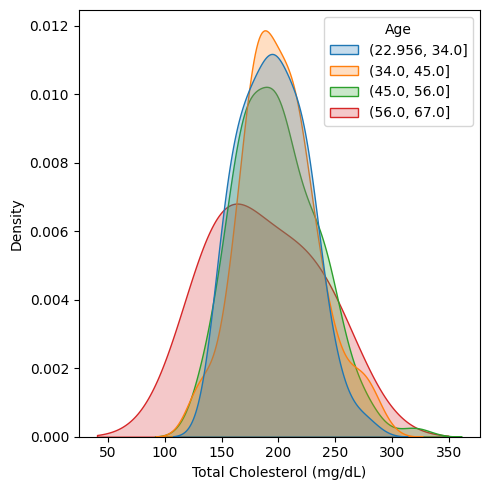

In [ ]:
create_density_plots(df, ['Total Cholesterol (mg/dL)'], hue='Age', bins=[0,30,40,50,60])
create_density_plots(df, ['Total Cholesterol (mg/dL)'], hue='Age', bins=4)

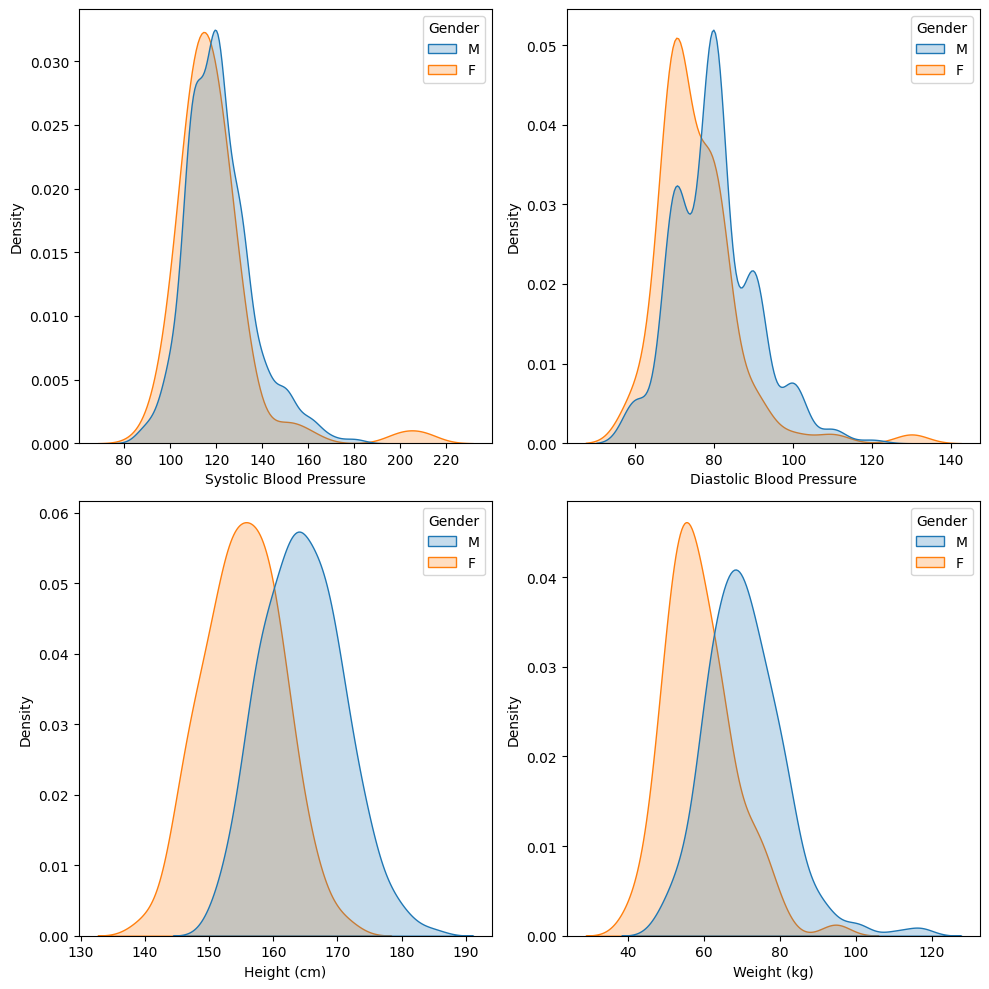

In [ ]:
create_density_plots(df, ['Systolic Blood Pressure','Diastolic Blood Pressure', 'Height (cm)', 'Weight (kg)','Gender'], hue='Gender')

# Missingno Matrix
**Use Case:** \
Helps visualize the rows with missing values \
Sparkline indicates how many missing values there are in each row.

**Actionable Next Steps:** \
Dropping certain features \
Null Imputation 

<Axes: >

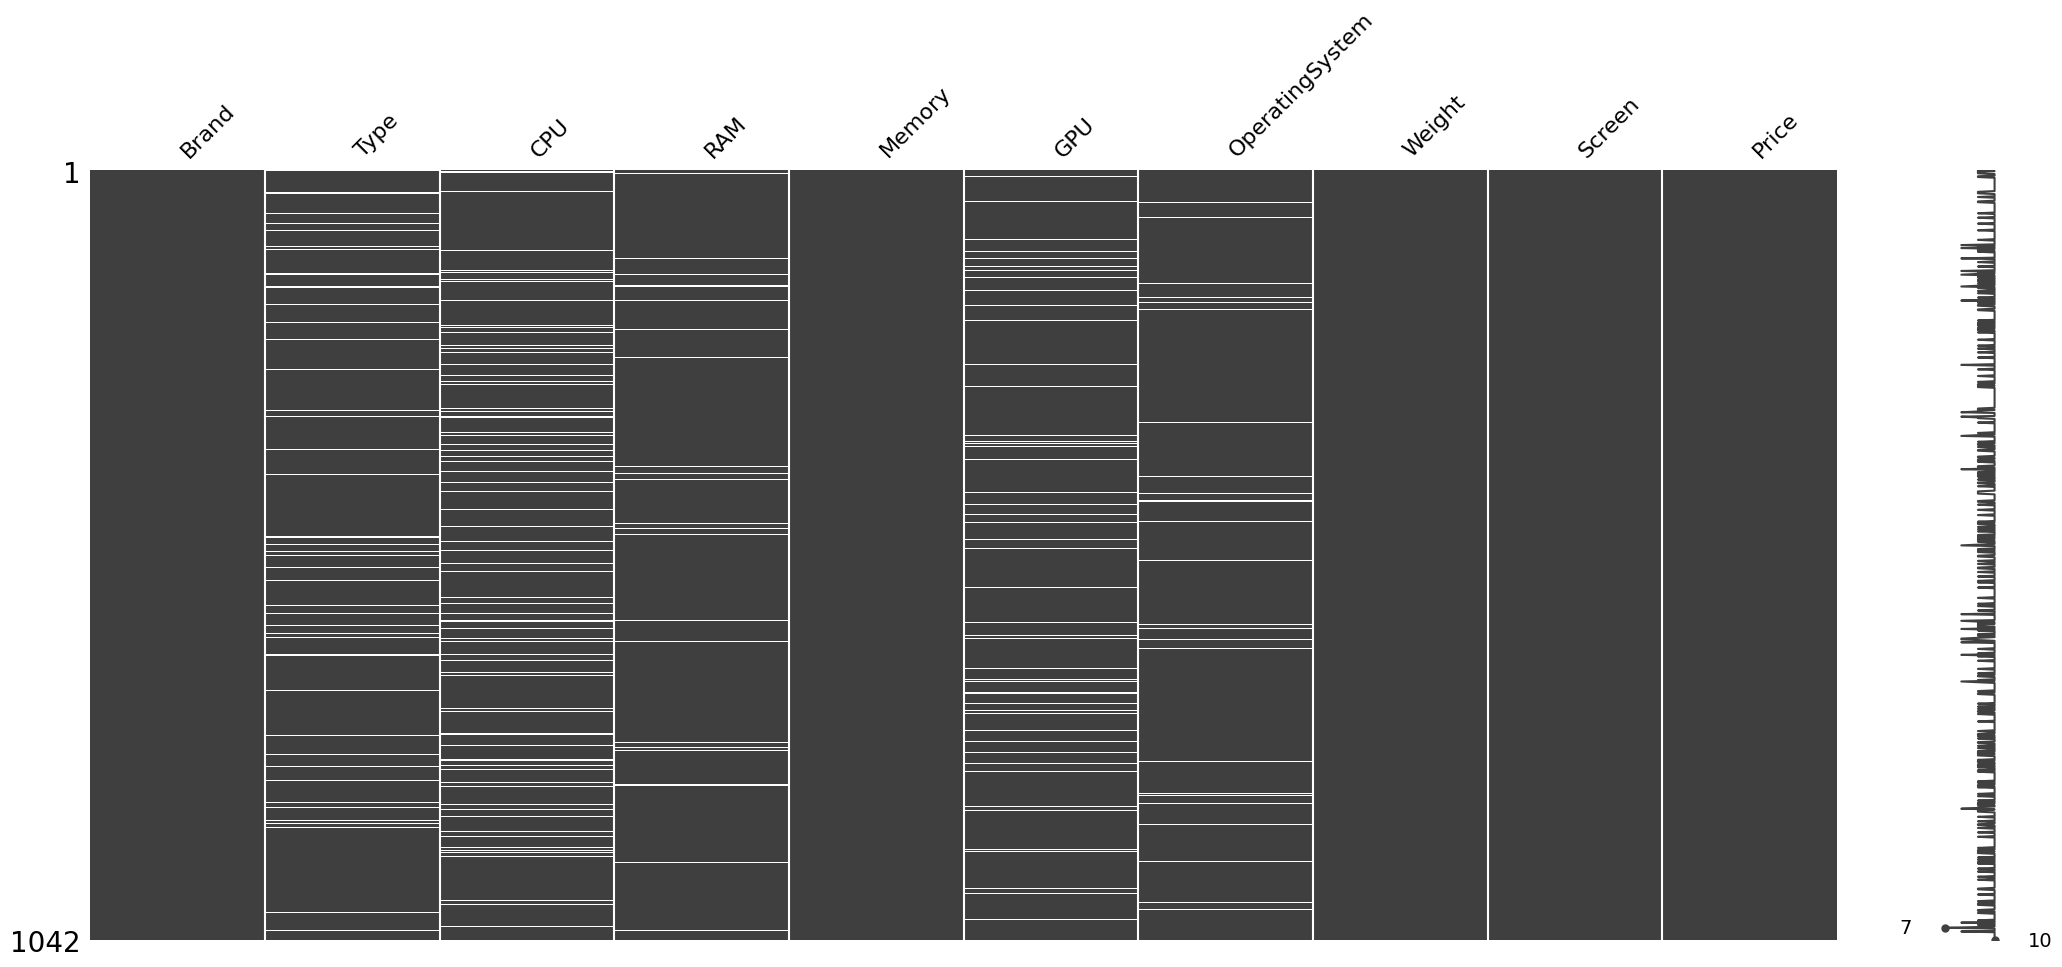

In [ ]:
import missingno as msno
msno.matrix(df)

# Missingno Bar
**Use Case:** \
Shows you the percentage of non-null data and the amount of rows without null data \

**Actionable Next Steps:** \
Dropping certain features \
Null Imputation 

<Axes: >

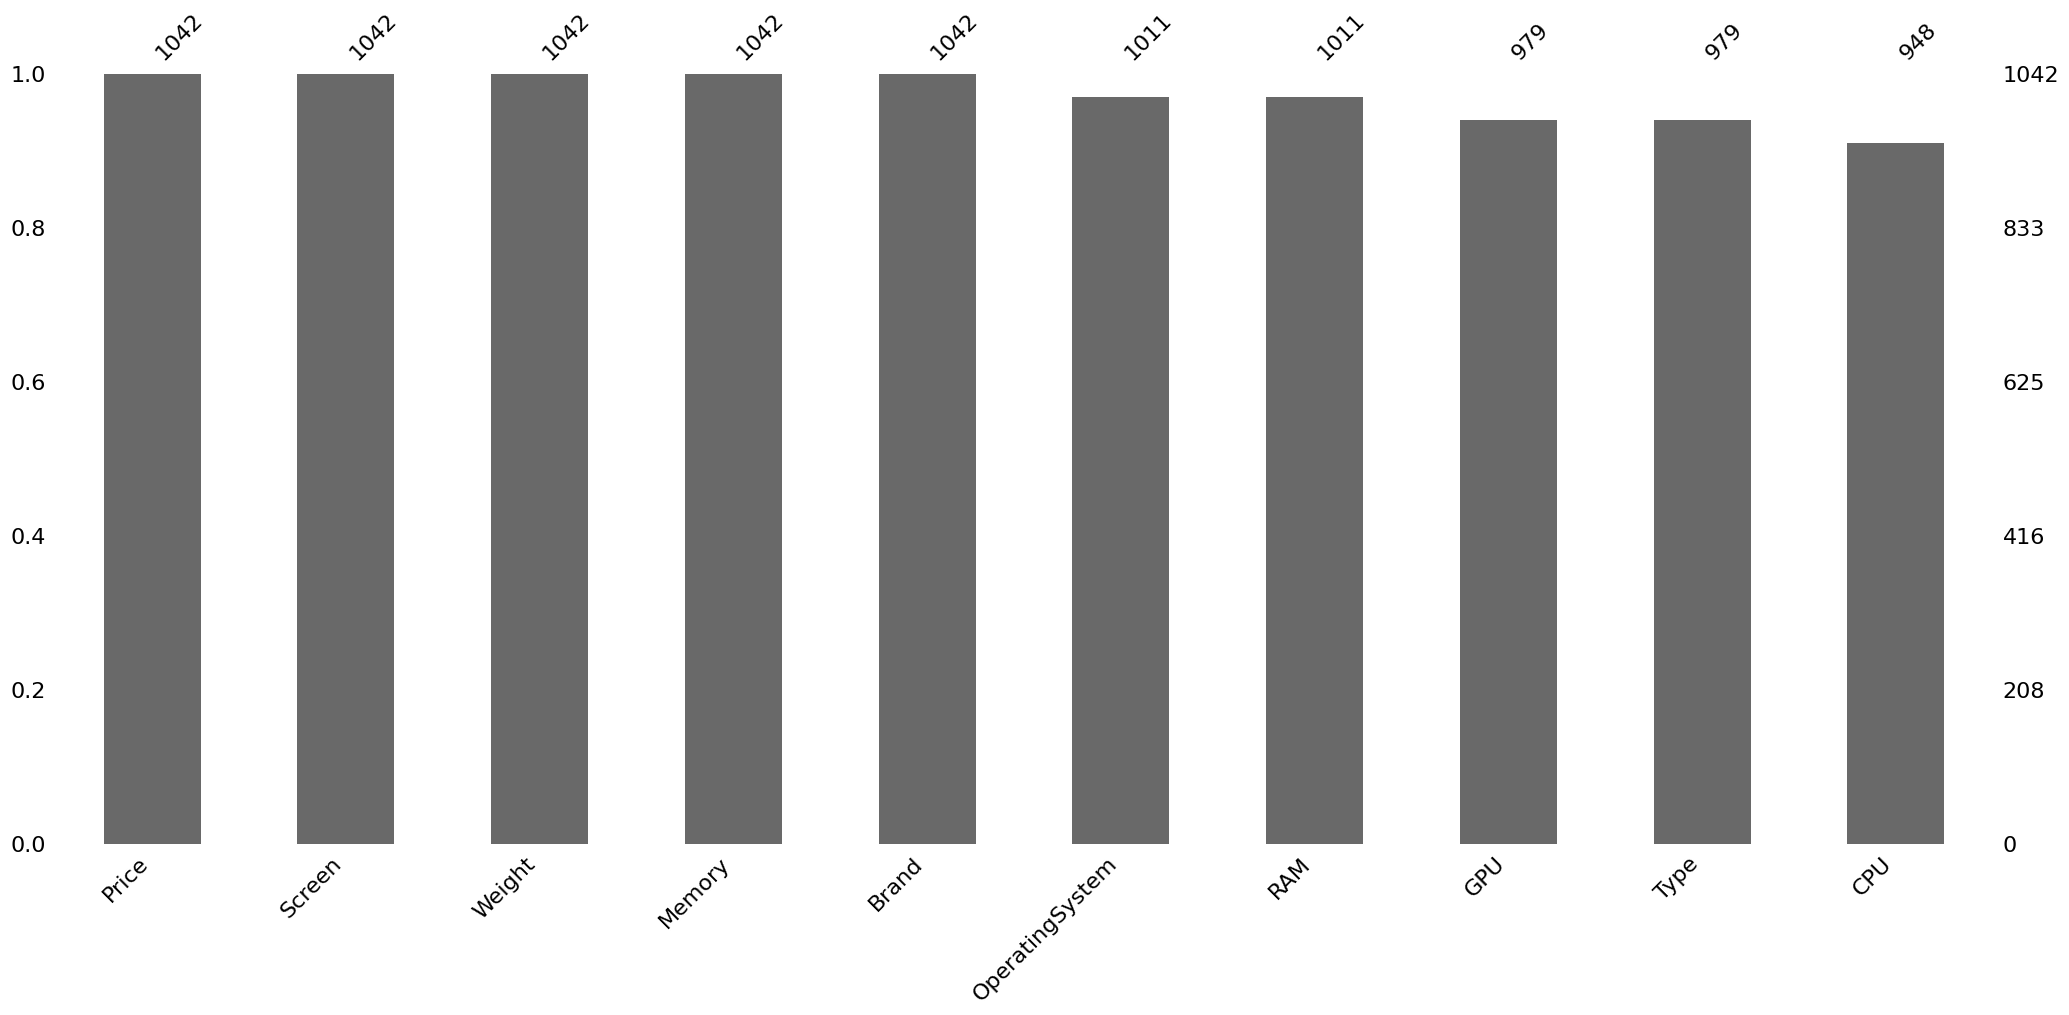

In [ ]:
import missingno as msno
msno.bar(df, sort="descending")